In [135]:
import pandas as pd
from plotnine import *

## Study Case 1

In [136]:
df_case_1 = pd.read_csv('study_case1.csv',
                        names=['Sales', 'Month', 'CustomerID', 'Rank'], 
                        sep=';', engine='python',
                        decimal=',')
df_case_1.head()

,Sales,Month,CustomerID,Rank
0,11493.2,1,MEREP,1
1,11283.2,1,SIMOB,2
2,9515.4,1,ERNSH,3
3,4533.5,1,BOTTM,4
4,3868.6,1,RATTC,5


In [137]:
df_case_1[df_case_1['CustomerID'] == "ERNSH"]

,Sales,Month,CustomerID,Rank
2,9515.40,1,ERNSH,3
18,1792.00,2,ERNSH,9
31,8623.45,4,ERNSH,2
62,6300.00,7,ERNSH,3
70,6483.05,8,ERNSH,1
88,1921.00,9,ERNSH,9
94,3600.73,10,ERNSH,5
110,14584.00,12,ERNSH,1


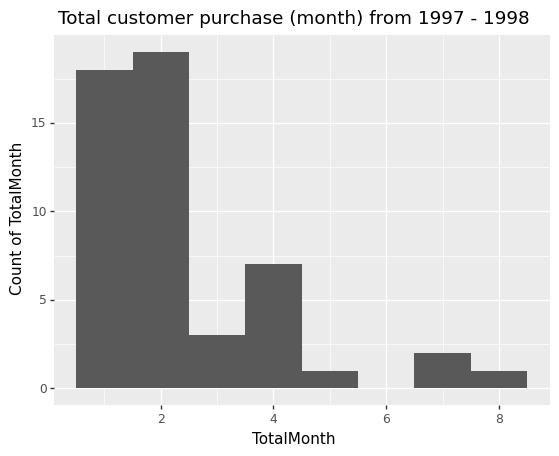

<ggplot: (8755371391214)>

In [138]:
# frequent_appearance = 
c = df_case_1.groupby('CustomerID', as_index=False).count()[['CustomerID','Sales']].rename(columns={'Sales': 'TotalMonth'})

(
    ggplot(c) +
    aes(x="TotalMonth") +
    geom_histogram(binwidth=1) +
    labs(title='Total customer purchase (month) from 1997 - 1998') +
    ylab("Count of TotalMonth") +
    xlab("TotalMonth")
)

/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


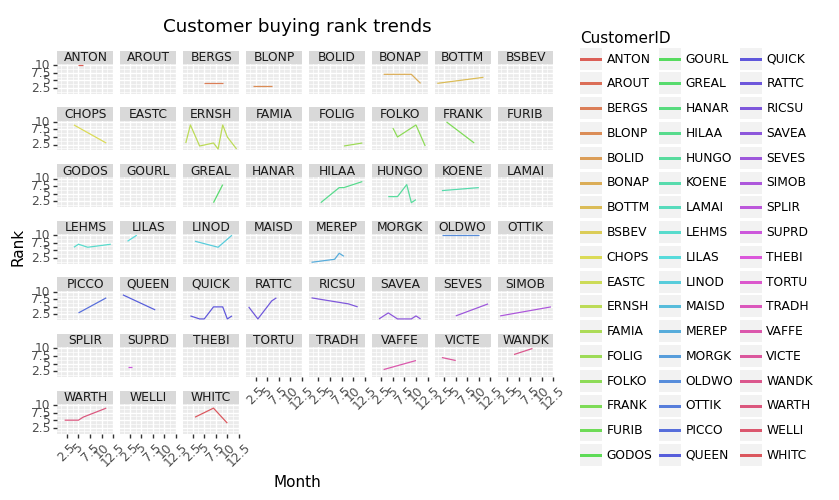

<ggplot: (8755370013627)>

In [139]:
(
    ggplot(data=df_case_1,
           mapping= aes(x='Month',
                          y='Rank',
                          color='CustomerID'))
    + geom_line()
    + facet_wrap("CustomerID")
    + labs(title="Customer buying rank trends")
    + theme(axis_text_x=element_text(angle=45))
)

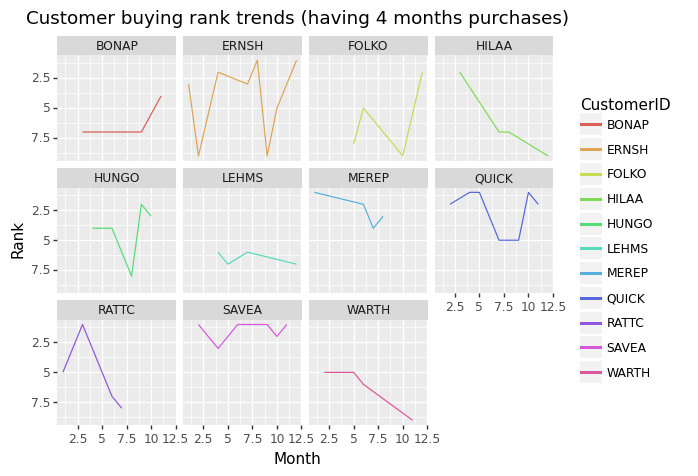

<ggplot: (8755371015946)>

In [141]:
fr = c[c['TotalMonth'] >= 4]['CustomerID'].values
(
    ggplot(data=df_case_1[df_case_1.CustomerID.isin(fr)],
           mapping= aes(x='Month',
                          y='Rank',
                          color='CustomerID'))
    + geom_line()
    + facet_wrap("CustomerID")
    + labs(title="Customer buying rank trends (having 4 months purchases)") 
    + scale_y_reverse()

)

Which month has the most sales? How about the trend?

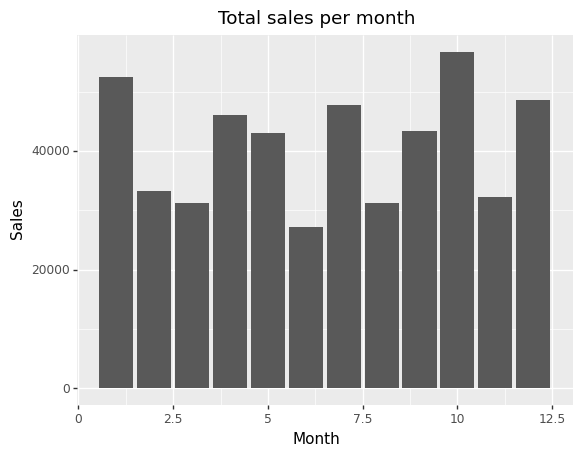

<ggplot: (8755370057485)>

In [130]:
s = df_case_1.groupby('Month',as_index=False).sum()

(
    ggplot(s) +
    aes(x="Month", y="Sales") +
    geom_col() +
    labs(title="Total sales per month")
)

In [92]:
df_case_1[df_case_1['Month'] == 1]

,Sales,Month,CustomerID,Quantity
0,11493.2,1,MEREP,1
1,11283.2,1,SIMOB,2
2,9515.4,1,ERNSH,3
3,4533.5,1,BOTTM,4
4,3868.6,1,RATTC,5
5,3063.0,1,EASTC,6
6,2603.2,1,LAMAI,7
7,2208.0,1,RICSU,8
8,2018.2,1,QUEEN,9
9,1897.6,1,WELLI,10


## Study Case 2

In [110]:
df_case_2 = pd.read_csv("study_case2.csv", names=['CategoryName','Year','Month', 'Quantity'],sep=';')
df_case_2.head()

,CategoryName,Year,Month,Quantity
0,Beverages,1997,1,330
1,Beverages,1997,2,220
2,Beverages,1997,3,471
3,Beverages,1997,4,268
4,Beverages,1997,5,322


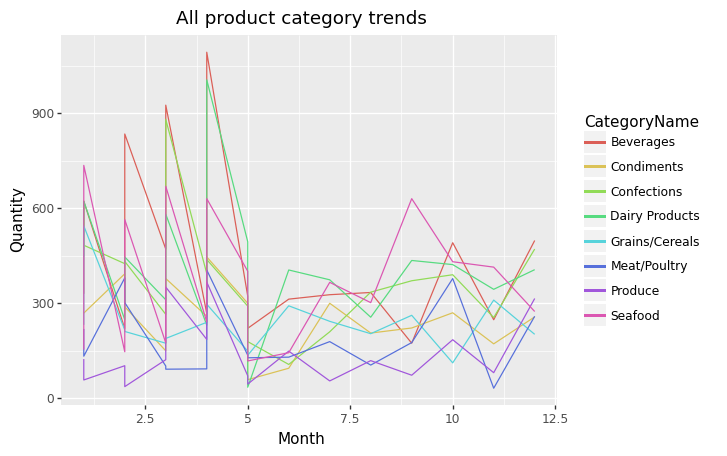

<ggplot: (8755371334301)>

In [119]:
(
  ggplot(df_case_2) +
  aes(x="Month", y="Quantity", color="CategoryName") +
  geom_line() +
  labs(title="All product category trends")
)

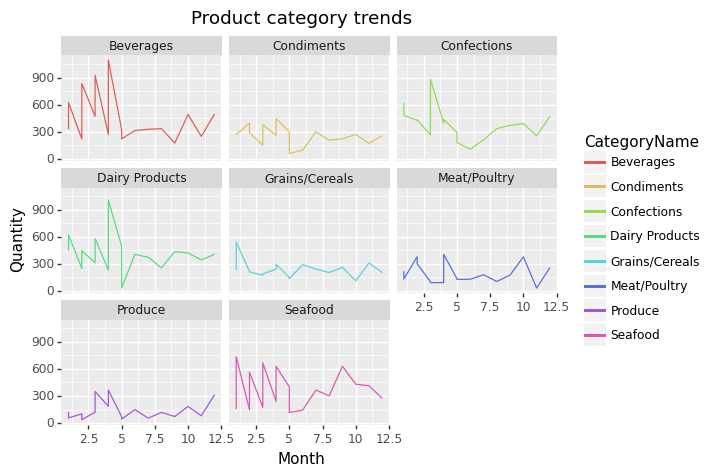

<ggplot: (8755370188445)>

In [124]:
(
  ggplot(df_case_2) +
  aes(x="Month", y="Quantity", color="CategoryName") +
  geom_line() +
  facet_wrap("CategoryName") +
  labs(title="Product category trends")
)

Overall, each product category reaches its peaks on the first semester of the year. It can be seen that beverages, dairy products, confections, seafood and produce have the same pattern. Besides this seasonal pattern, there are some consistent trends among condiments, grainds/ceral, meat/poultry and produce products.

## Study Case 3

In [126]:
df_case_3 = pd.read_csv("study_case3.csv", names=['OrderNumber','Title'],sep=';')
df_case_3.head()

,OrderNumber,Title
0,54,Inside Sales Coordinator
1,18,Sales Manager
2,295,Sales Representative
3,41,"Vice President, Sales"


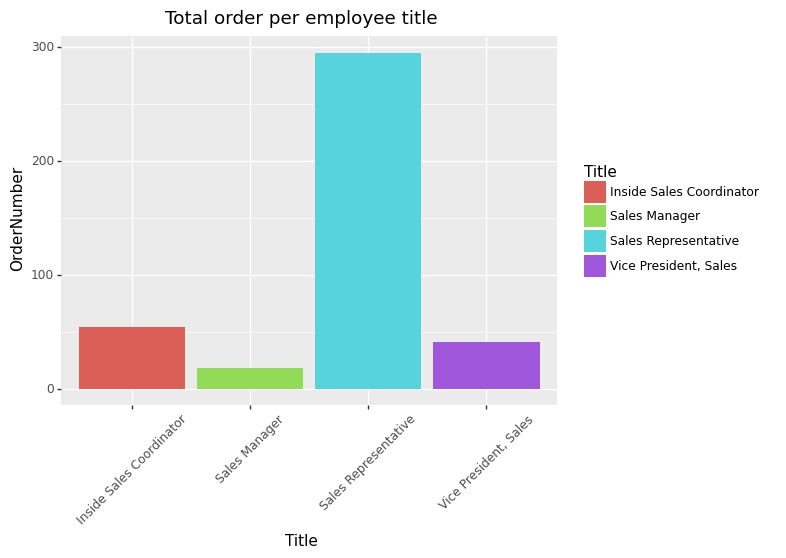

<ggplot: (8755369816604)>

In [134]:
(
  ggplot(df_case_3) +
  aes(x='Title', y='OrderNumber', fill='Title') +
  geom_col() +
  labs(title='Total order per employee title') + 
  theme(axis_text_x=element_text(angle=45))
)